# Imports

In [1]:
import datetime as dt
from pathlib import Path
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
filterwarnings('ignore')

In [2]:
%reload_ext autoreload
%autoreload 2

# Load Data

In [3]:
PATH = Path('data/chapter_1/')
%ls {PATH}

average_quantity.csv  cohort_counts.csv     online.csv


In [4]:
!wc data/chapter_1/* | grep -v total | sort -r

   70864  468749 6804165 data/chapter_1/online.csv
      14      14    1938 data/chapter_1/average_quantity.csv
      14      14     748 data/chapter_1/cohort_counts.csv


In [5]:
!head -5 {PATH / 'online.csv'}

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM ,6,2011-10-25 08:26:00,2.1,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2 ,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.1,17290,United Kingdom


In [6]:
df = pd.read_csv(PATH / 'online.csv', low_memory=True,
                 index_col=0, parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


# Data Preparation

In [28]:
# Get invoice month by making all invoice dates start at the
# beginning of the month
def get_month(x):
    '''Return the beiginning of the month'''
    return pd.datetime(x.year, x.month, 1)

In [29]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [30]:
# Group customers to their first month of purchase
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [31]:
def get_date_int(df, column):
    '''Return year and month of a datetime object'''
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [32]:
# Calculate months offsets
invoice_year, invoice_month = get_date_int(df, 'InvoiceDate')
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


# Retention by Cohorts

In [33]:
# Count monthly active customers for each cohort
cohort_data = (df.groupby(['CohortMonth', 'CohortIndex'])
               ['CustomerID'].apply(pd.Series.nunique)
               .reset_index())
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245


In [34]:
# Get cohort counts
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Get the retention rate for each each cohort
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0).round(3)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.344,0.309,0.351,0.342,0.398,0.348,0.330,0.335,0.370,0.355,0.486,0.24
2011-01-01,1.0,0.208,0.247,0.244,0.331,0.271,0.247,0.259,0.313,0.307,0.373,0.136,NaN
2011-02-01,1.0,0.184,0.180,0.263,0.269,0.234,0.253,0.263,0.272,0.301,0.089,NaN,NaN
2011-03-01,1.0,0.162,0.258,0.196,0.214,0.173,0.253,0.219,0.276,0.098,NaN,NaN,NaN
2011-04-01,1.0,0.192,0.204,0.192,0.184,0.204,0.220,0.231,0.067,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.161,0.173,0.145,0.209,0.233,0.245,0.088,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159,0.126,0.198,0.237,0.300,0.092,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.162,0.179,0.220,0.254,0.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.216,0.201,0.252,0.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Show only year and month
retention.index = retention.index.strftime('%Y-%m')
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12,1.0,0.344,0.309,0.351,0.342,0.398,0.348,0.330,0.335,0.370,0.355,0.486,0.24
2011-01,1.0,0.208,0.247,0.244,0.331,0.271,0.247,0.259,0.313,0.307,0.373,0.136,NaN
2011-02,1.0,0.184,0.180,0.263,0.269,0.234,0.253,0.263,0.272,0.301,0.089,NaN,NaN
2011-03,1.0,0.162,0.258,0.196,0.214,0.173,0.253,0.219,0.276,0.098,NaN,NaN,NaN
2011-04,1.0,0.192,0.204,0.192,0.184,0.204,0.220,0.231,0.067,NaN,NaN,NaN,NaN
2011-05,1.0,0.161,0.173,0.145,0.209,0.233,0.245,0.088,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.159,0.126,0.198,0.237,0.300,0.092,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.162,0.179,0.220,0.254,0.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.216,0.201,0.252,0.101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,1.0,0.201,0.280,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


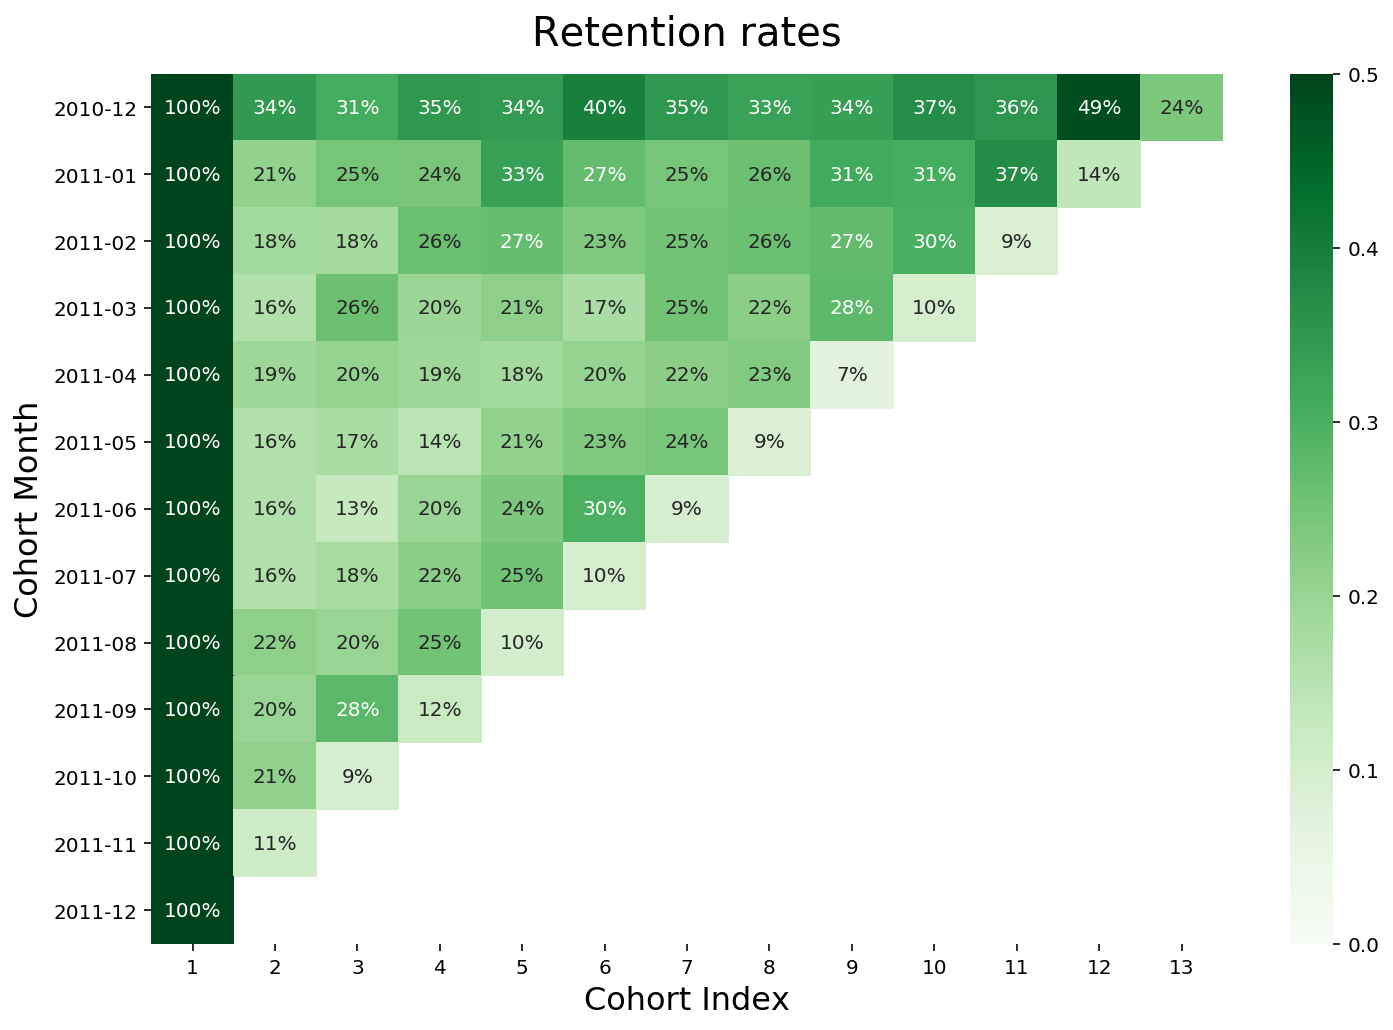

In [64]:
# Plot heatmap for customer retentions
plt.figure(figsize=(12, 8))
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0, vmax=0.5, cmap='Greens')
plt.xlabel('Cohort Index', fontsize=16)
plt.ylabel('Cohort Month', fontsize=16)
plt.title('Retention rates', fontsize=20, y=1.02);

# Average Quantities by Cohort

In [67]:
# Average monthly purchased quantities customers for each cohort
cohort_data = (df.groupby(['CohortMonth', 'CohortIndex'])
               ['Quantity'].mean()
               .reset_index())
cohort_data.head()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1,11.111588
1,2010-12-01,2,12.260241
2,2010-12-01,3,12.152314
3,2010-12-01,4,13.228676
4,2010-12-01,5,13.669839


In [75]:
# Get cohort average quantities
average_quantities = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='Quantity').round(1)
average_quantities

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Show only year and month
average_quantities.index = average_quantities.index.strftime('%Y-%m')
average_quantities

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,11.5,6.3,8.4,9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
pd.Series(average_quantities.values.round(0).flatten()).value_counts().sort_index()

6.0      7
7.0      6
8.0      5
9.0      3
10.0    14
11.0    13
12.0    13
13.0    10
14.0     8
15.0     1
16.0     5
17.0     2
18.0     2
19.0     1
21.0     1
dtype: int64

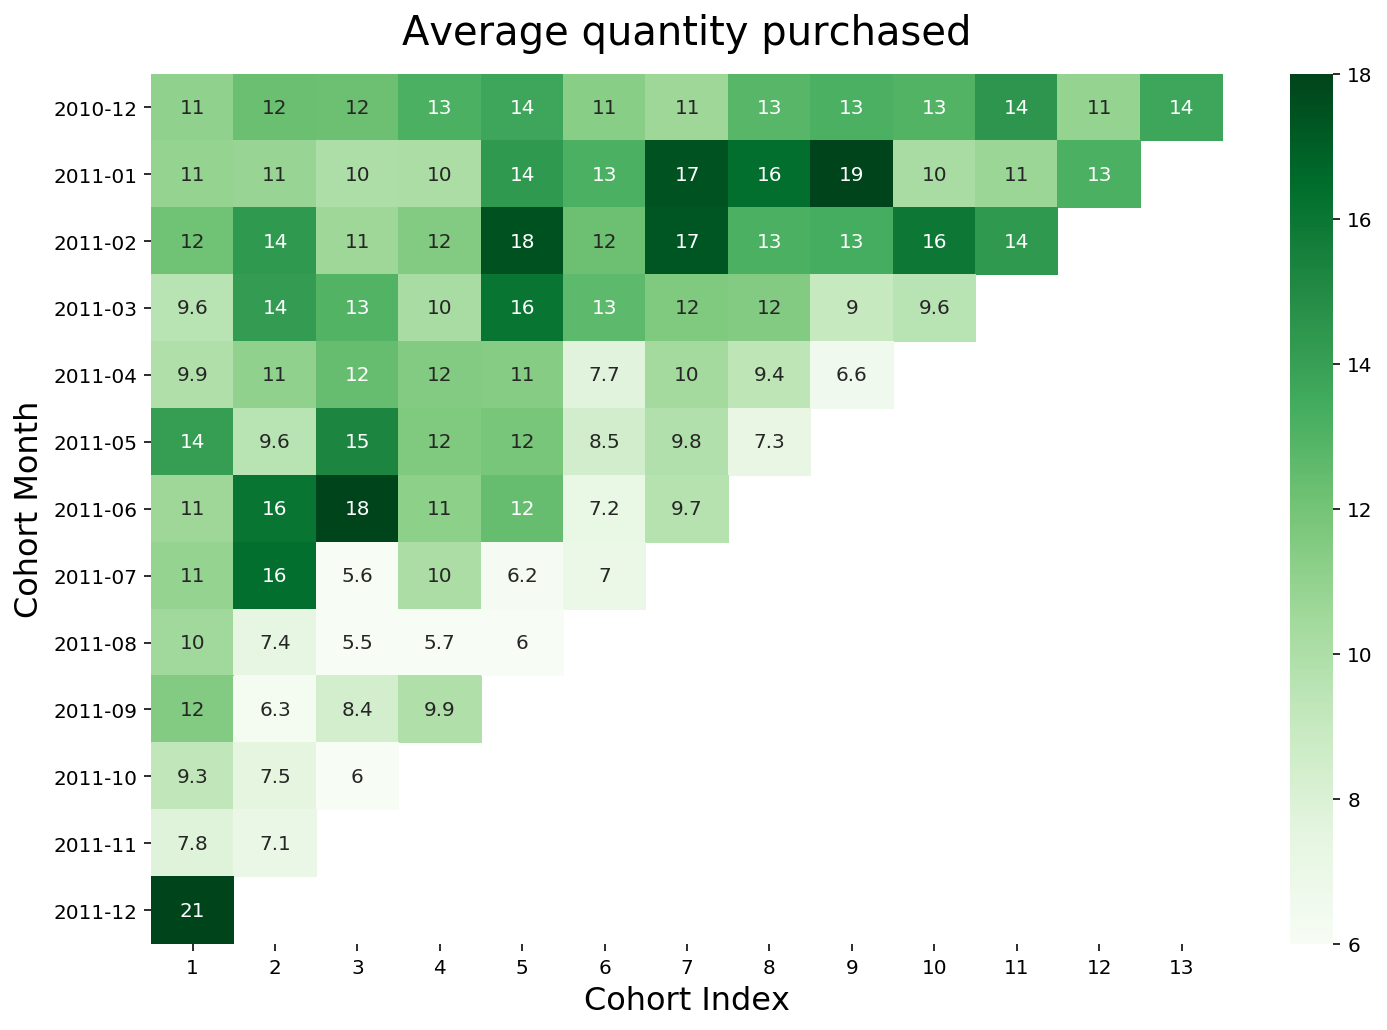

In [89]:
# Plot heatmap of average quantities
plt.figure(figsize=(12, 8))
sns.heatmap(data=average_quantities, annot=True, vmin=6, vmax=18, cmap='Greens')
plt.xlabel('Cohort Index', fontsize=16)
plt.ylabel('Cohort Month', fontsize=16)
plt.title('Average quantity purchased', fontsize=20, y=1.02);